<a href="https://colab.research.google.com/github/RodrigoAB93/Trabalho_AM_Nao_Supervisionado/blob/main/Trabalho_Aprendizado_de_maquina_n%C3%A3o_supervisionado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#---------------------------------------------------------------------------------------------# 
### Trabalho desenvolvido para disciplina Aprendizado de Maquina não supervisionada. 
### Desenvolvido por: 
### Rodrigo Almeida Bezerra 
### rodrigobezerra@ufba.br  
### Professor:  Ricardo Araujo Rios  
### Fonte:https://www.kaggle.com/datasets/derrickmwiti/google-2019-cluster-sample
#---------------------------------------------------------------------------------------------# 

In [1]:
#Importando bibliotecas necessárias. 
# DataFrame 
import pandas as pd 


# Matplot
import matplotlib.pyplot as plt
import matplotlib as mpl

# Scikit-learn
from sklearn import preprocessing, metrics
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score, jaccard_score
from sklearn.cluster import DBSCAN 
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler 


# Helper Libraries 
import numpy as np 
import seaborn as sns   
import plotly.express as px   

 





In [2]:
data = pd.read_csv('/content/drive/MyDrive/Mestrado/TrabalhoInteligenciaComputacional/GoogleCluster2019.csv',sep=',') 
data

,Unnamed: 0,time,instance_events_type,collection_id,scheduling_class,collection_type,priority,alloc_collection_id,instance_index,machine_id,...,assigned_memory,page_cache_memory,cycles_per_instruction,memory_accesses_per_instruction,sample_rate,cpu_usage_distribution,tail_cpu_usage_distribution,cluster,event,failed
0,0,0,2,94591244395,3,1,200,0,144,168846390496,...,0.014435,0.000415,NaN,NaN,1.000000,[0.00314331 0.00381088 0.00401306 0.00415039 0...,[0.00535583 0.00541687 0.00548553 0.00554657 0...,7,FAIL,1
1,1,2517305308183,2,260697606809,2,0,360,221495397286,335,85515092,...,0.000000,0.000000,NaN,NaN,1.000000,[1.23977661e-05 1.23977661e-05 1.23977661e-05 ...,[1.23977661e-05 1.23977661e-05 1.23977661e-05 ...,7,FAIL,1
2,2,195684022913,6,276227177776,2,0,103,0,376,169321752432,...,0.010422,0.000235,0.939919,0.001318,1.000000,[0.01344299 0.01809692 0.0201416 0.02246094 0...,[0.02902222 0.02929688 0.0295105 0.0296936 0...,7,SCHEDULE,0
3,3,0,2,10507389885,3,0,200,0,1977,178294817221,...,0.041626,0.000225,1.359102,0.007643,1.000000,[0.03704834 0.04125977 0.04290771 0.04425049 0...,[0.05535889 0.05584717 0.05633545 0.05718994 0...,8,FAIL,1
4,4,1810627494172,3,25911621841,2,0,0,0,3907,231364893292,...,0.000272,0.000010,NaN,NaN,1.000000,[0. 0. 0. 0. 0...,[0.00041485 0.00041485 0.00041485 0.00041485 0...,2,FINISH,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405889,405889,0,2,299950285958,1,0,117,0,1341,10625460233,...,0.002117,0.000048,0.693324,0.003158,1.000000,[0.00022793 0.00822449 0.00866699 0.01246643 0...,[0.0222168 0.02261353 0.02294922 0.02404785 0...,8,FAIL,1
405890,405890,18279167039,0,330587213089,2,0,360,330587120885,898,68669881389,...,0.000000,0.002468,1.019433,0.001859,1.000000,[0.01028442 0.02087402 0.02432251 0.02661133 0...,[0.05828857 0.05871582 0.05938721 0.06097412 0...,1,ENABLE,0
405891,405891,733307641549,3,13748637767,3,0,200,13748635759,1959,126641993288,...,0.000000,0.000480,0.990970,0.002941,1.000000,[0.00857544 0.01472473 0.01660156 0.01873779 0...,[0.03515625 0.03552246 0.03729248 0.03912354 0...,2,FINISH,0
405892,405892,1984523129238,2,323372663325,1,0,117,0,6452,191941429308,...,0.001562,0.000229,3.023431,0.015743,0.996667,[0.00024414 0.00030136 0.00036907 0.00073719 0...,[0.00904846 0.00907898 0.00909424 0.00912476 0...,8,FAIL,1


In [3]:
#Substitui onde tiver NaN por 0
data = data.fillna(0)

In [4]:
#Trabalhando somente com uma amostra
data = data.sample(1000) 
data

,Unnamed: 0,time,instance_events_type,collection_id,scheduling_class,collection_type,priority,alloc_collection_id,instance_index,machine_id,...,assigned_memory,page_cache_memory,cycles_per_instruction,memory_accesses_per_instruction,sample_rate,cpu_usage_distribution,tail_cpu_usage_distribution,cluster,event,failed
179355,179355,159790872079,1,738884589598,1,0,105,0,1408,328706337,...,0.015625,0.000010,1.053583,0.006552,1.000000,[0.00017548 0.00021362 0.00023937 0.00026226 0...,[0.00351715 0.00386429 0.00406647 0.00445557 0...,3,EVICT,0
116753,116753,285867451192,3,128073972032,2,0,25,0,340,157669392832,...,0.000442,0.000000,1.494825,0.008345,1.000000,[0.00104332 0.00116158 0.0012188 0.00126457 0...,[0.0017643 0.00178528 0.00180817 0.00184059 0...,3,FINISH,0
373353,373353,1762914802049,5,758263544732,0,0,103,0,5889,10214958,...,0.002453,0.000586,0.000000,0.000000,1.000000,[4.29153442e-05 7.92503357e-04 1.45339966e-03 ...,[0.01535034 0.01538086 0.01539612 0.01542664 0...,3,LOST,0
41664,41664,568060652610,5,781395587588,2,0,360,698302736982,1272,46520831734,...,0.000000,0.001190,0.852417,0.001394,1.000000,[0.00000000e+00 0.00000000e+00 0.00000000e+00 ...,[0.00031948 0.00031948 0.00031948 0.00031948 0...,4,LOST,0
363290,363290,1561797689249,1,330587172974,2,1,101,0,16,4646683771,...,0.032654,0.002155,0.000000,0.000000,1.000000,[0.00022125 0.00067806 0.00880432 0.01254272 0...,[0.04968262 0.05053711 0.05126953 0.05206299 0...,1,EVICT,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307779,307779,2451165421534,6,296522493188,0,0,103,0,345,233938139282,...,0.003883,0.000887,0.930969,0.002929,1.000000,[0.00048065 0.00094414 0.00271988 0.00588989 0...,[0.01049805 0.01057434 0.01066589 0.01081848 0...,7,SCHEDULE,0
164986,164986,1689090001177,3,128073972032,2,0,25,0,449,56414651,...,0.000442,0.000000,1.494825,0.008345,1.000000,[0.00104332 0.00116158 0.0012188 0.00126457 0...,[0.0017643 0.00178528 0.00180817 0.00184059 0...,3,FINISH,0
300328,300328,2403250151182,3,369196996451,1,0,103,0,10283,97809089033,...,0.010422,0.000490,3.526053,0.015658,1.000000,[0.00031948 0.00035 0.00036526 0.00038052 0...,[0.00090027 0.00091839 0.00093746 0.00095654 0...,6,FINISH,0
16319,16319,1592343353697,2,285748470971,0,0,0,0,8,5805573896,...,0.002136,0.000040,1.331382,0.016535,0.996667,[0.00026512 0.0063324 0.00692749 0.00721741 0...,[0.00996399 0.01008606 0.01017761 0.01026917 0...,7,FAIL,1


In [5]:
data.head(10) 

,Unnamed: 0,time,instance_events_type,collection_id,scheduling_class,collection_type,priority,alloc_collection_id,instance_index,machine_id,...,assigned_memory,page_cache_memory,cycles_per_instruction,memory_accesses_per_instruction,sample_rate,cpu_usage_distribution,tail_cpu_usage_distribution,cluster,event,failed
179355,179355,159790872079,1,738884589598,1,0,105,0,1408,328706337,...,0.015625,1.049042e-05,1.053583,0.006552,1.0,[0.00017548 0.00021362 0.00023937 0.00026226 0...,[0.00351715 0.00386429 0.00406647 0.00445557 0...,3,EVICT,0
116753,116753,285867451192,3,128073972032,2,0,25,0,340,157669392832,...,0.000442,0.000000e+00,1.494825,0.008345,1.0,[0.00104332 0.00116158 0.0012188 0.00126457 0...,[0.0017643 0.00178528 0.00180817 0.00184059 0...,3,FINISH,0
373353,373353,1762914802049,5,758263544732,0,0,103,0,5889,10214958,...,0.002453,5.855560e-04,0.000000,0.000000,1.0,[4.29153442e-05 7.92503357e-04 1.45339966e-03 ...,[0.01535034 0.01538086 0.01539612 0.01542664 0...,3,LOST,0
41664,41664,568060652610,5,781395587588,2,0,360,698302736982,1272,46520831734,...,0.000000,1.190186e-03,0.852417,0.001394,1.0,[0.00000000e+00 0.00000000e+00 0.00000000e+00 ...,[0.00031948 0.00031948 0.00031948 0.00031948 0...,4,LOST,0
363290,363290,1561797689249,1,330587172974,2,1,101,0,16,4646683771,...,0.032654,2.155304e-03,0.000000,0.000000,1.0,[0.00022125 0.00067806 0.00880432 0.01254272 0...,[0.04968262 0.05053711 0.05126953 0.05206299 0...,1,EVICT,0
173095,173095,1013011961740,2,348020181306,1,0,200,0,5,92045129521,...,0.013016,0.000000e+00,0.000000,0.000000,1.0,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.],[0. 0. 0. 0. 0. 0. 0. 0. 0.],1,FAIL,1
391670,391670,1050510880051,5,276842727140,2,0,360,271641579270,1630,10038174014,...,0.000000,2.975464e-04,0.000000,0.000000,1.0,[7.05718994e-05 7.34329224e-05 7.82012939e-05 ...,[0.00016212 0.00016403 0.00016594 0.0001688 0...,6,LOST,0
18898,18898,1686441378713,0,793077145663,1,0,200,0,14845,14638473232,...,0.009476,9.536743e-07,4.643307,0.014274,1.0,[0.00010777 0.00011539 0.00012398 0.00013161 0...,[0.00021076 0.00021648 0.00022602 0.00024223 0...,4,ENABLE,0
132975,132975,1656136607218,3,14423004927,2,0,0,0,3721,190577466054,...,0.000196,9.536743e-07,2.008303,0.007136,1.0,[3.52859497e-05 5.05447388e-05 9.44137573e-05 ...,[0.00038242 0.00038624 0.00039005 0.00039387 0...,5,FINISH,0
232430,232430,2047507778015,0,157857385389,1,0,103,0,884,206795150340,...,0.187500,1.735687e-03,4.109885,0.019481,1.0,[0.00032139 0.0015316 0.00167656 0.00187302 0...,[0.01480103 0.01654053 0.02023315 0.02352905 0...,8,ENABLE,0


In [6]:
#Eliminando colunas desnecessarias 
data = data.drop(columns=['Unnamed: 0','time', 'instance_events_type', 'resource_request', 'average_usage','cpu_usage_distribution', 'tail_cpu_usage_distribution','collection_id','scheduling_class', 'collection_type', 'priority','alloc_collection_id', 'instance_index', 'constraint', 'collections_events_type', 'user',
       'collection_name', 'collection_logical_name','start_after_collection_ids', 'vertical_scaling', 'scheduler','start_time', 'end_time', 'maximum_usage','random_sample_usage', 'assigned_memory', 'page_cache_memory', 'memory_accesses_per_instruction'])

In [7]:
data.columns 

Index(['machine_id', 'cycles_per_instruction', 'sample_rate', 'cluster',
       'event', 'failed'],
      dtype='object')

In [8]:
data

,machine_id,cycles_per_instruction,sample_rate,cluster,event,failed
179355,328706337,1.053583,1.000000,3,EVICT,0
116753,157669392832,1.494825,1.000000,3,FINISH,0
373353,10214958,0.000000,1.000000,3,LOST,0
41664,46520831734,0.852417,1.000000,4,LOST,0
363290,4646683771,0.000000,1.000000,1,EVICT,0
...,...,...,...,...,...,...
307779,233938139282,0.930969,1.000000,7,SCHEDULE,0
164986,56414651,1.494825,1.000000,3,FINISH,0
300328,97809089033,3.526053,1.000000,6,FINISH,0
16319,5805573896,1.331382,0.996667,7,FAIL,1


In [9]:
#LOST = 0 
#FAIL = 1 
#FINISH = 2  
#SCHEDULE = 3 
#ENABLE = 4  
#EVICT = 5 
#KILL = 6 
#UPDATE_PENDING = 7
data = data.replace('LOST',0).replace('FAIL',1).replace('FINISH',2).replace('SCHEDULE',3).replace('ENABLE',4).replace('EVICT',5).replace('KILL',6).replace('UPDATE_PENDING',7)  
data

,machine_id,cycles_per_instruction,sample_rate,cluster,event,failed
179355,328706337,1.053583,1.000000,3,5,0
116753,157669392832,1.494825,1.000000,3,2,0
373353,10214958,0.000000,1.000000,3,0,0
41664,46520831734,0.852417,1.000000,4,0,0
363290,4646683771,0.000000,1.000000,1,5,0
...,...,...,...,...,...,...
307779,233938139282,0.930969,1.000000,7,3,0
164986,56414651,1.494825,1.000000,3,2,0
300328,97809089033,3.526053,1.000000,6,2,0
16319,5805573896,1.331382,0.996667,7,1,1


In [10]:
print(data.shape) 


(1000, 6)


Gráfico Histograma

In [11]:
fig = px.histogram(data, x="machine_id",y="cluster")
fig.show()


Grafico de Disperção multivariado

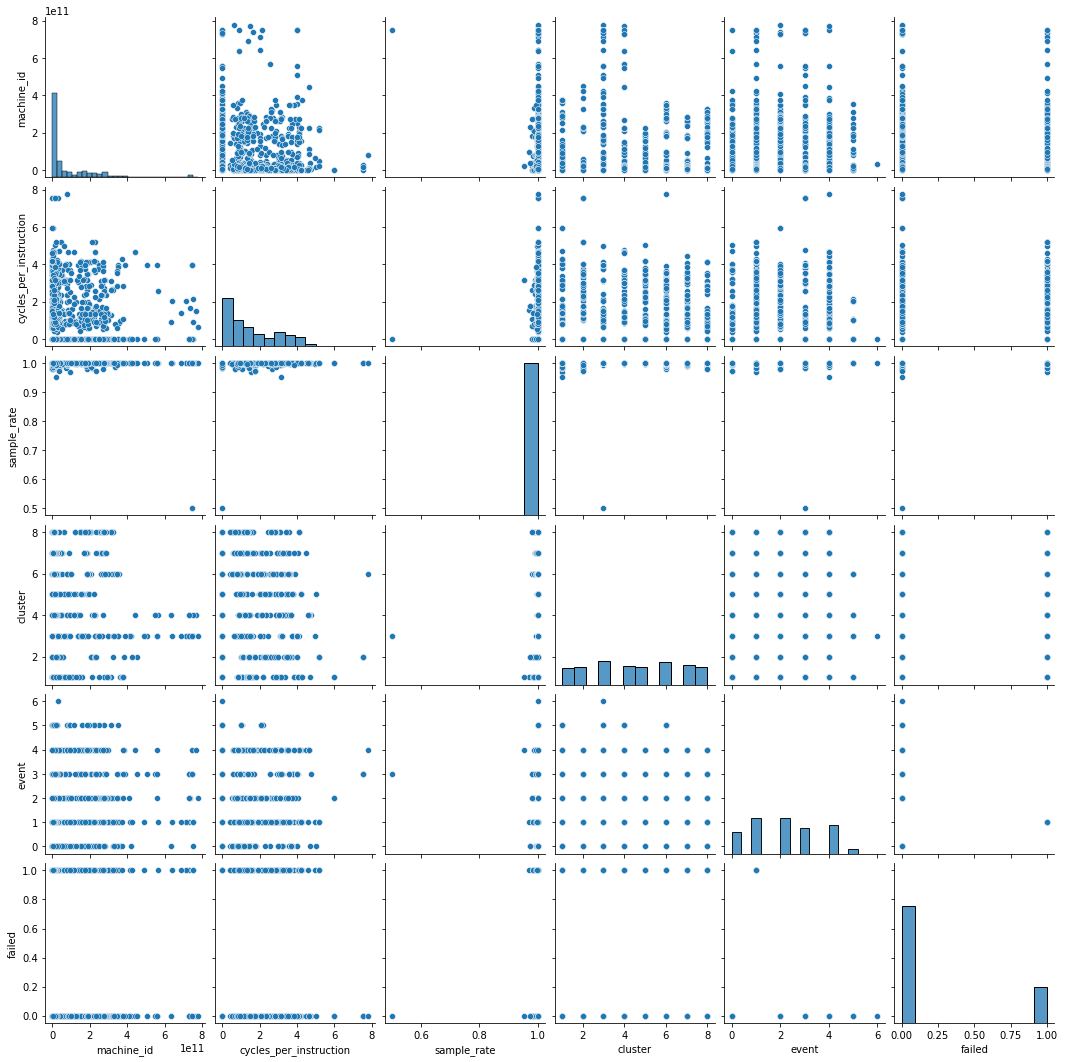

In [12]:
sns.pairplot(data)  

Gráficos Box plot


In [13]:
fig = px.box(data, x="event",y="cluster")
fig.show() 
#LOST = 0 #FAIL = 1 #FINISH = 2 #SCHEDULE = 3 #ENABLE = 4  #EVICT = 5 #KILL = 6 #UPDATE_PENDING = 7 

GRÁFICO HISTOGRAMA EMPILHADO

<Figure size 432x288 with 0 Axes>

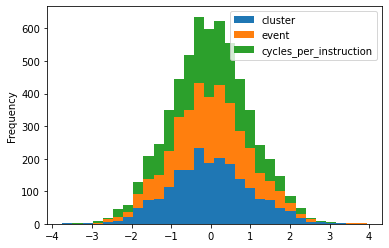

In [14]:
# HISTOGRAMA EMPILHADO
data_hist = pd.DataFrame(
      {
         "cluster": np.random.randn(2000) ,
         "event": np.random.randn(2000),
         "cycles_per_instruction": np.random.randn(2000),
       },
  columns=["cluster", "event","cycles_per_instruction"],
   ).astype(float);
plt.figure();
data_hist.plot.hist(stacked=True, bins=30);

Gráfico Boxplot

In [15]:
scatterplot1 = px.scatter(data, x="machine_id",y="cluster")
scatterplot1.show()

Matriz de Correlação


In [16]:
corr = data.iloc[:,0:].corr()
corr

,machine_id,cycles_per_instruction,sample_rate,cluster,event,failed
machine_id,1.000000,-0.021423,-0.143761,-0.061768,-0.027324,0.020935
cycles_per_instruction,-0.021423,1.000000,0.032769,0.047088,0.027767,0.125776
sample_rate,-0.143761,0.032769,1.000000,0.029719,-0.008018,0.004238
cluster,-0.061768,0.047088,0.029719,1.000000,0.118245,-0.042488
event,-0.027324,0.027767,-0.008018,0.118245,1.000000,-0.435478
failed,0.020935,0.125776,0.004238,-0.042488,-0.435478,1.000000


Kmeans


In [24]:
kmeans = KMeans(n_clusters=5, random_state=1000)# random_state= semente aleatoria
clustering = kmeans.fit_predict(data) 
clustering

array([1, 4, 1, 1, 1, 0, 1, 1, 4, 4, 0, 1, 1, 1, 1, 1, 1, 1, 4, 3, 0, 1,
       1, 4, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 1, 0, 3, 2, 1, 1, 4, 4, 1, 1, 3, 1, 1, 1, 3, 0, 1, 1, 3, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 2, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 4, 1, 2, 3, 3, 3, 1, 1, 3, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 0, 1, 1, 1, 1, 1, 1,
       0, 3, 4, 4, 4, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 4, 1, 1, 1, 1, 2,
       4, 1, 0, 1, 1, 4, 1, 1, 3, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 4, 1,
       1, 1, 1, 3, 1, 1, 0, 4, 1, 2, 1, 1, 1, 1, 4, 1, 1, 4, 3, 1, 4, 1,
       0, 1, 1, 4, 4, 0, 1, 1, 4, 1, 1, 4, 4, 3, 1, 1, 1, 1, 4, 1, 1, 2,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 4, 1, 1, 1, 0, 4, 0, 1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1,
       1, 1, 1, 1, 4, 3, 4, 1, 1, 4, 1, 1, 1, 1, 1, 0, 1, 4, 1, 1, 1, 1,
       4, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 4, 1, 0, 1,

In [25]:
silhouette_avg = silhouette_score(data, clustering)
print("Silhouette avg:", silhouette_avg)

Silhouette avg: 0.7223811618958164


In [26]:
clustering = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage = 'average')
clustering = clustering.fit_predict(data)

In [27]:
silhouette_avg = silhouette_score(data, clustering)
print("Silhouette avg:", silhouette_avg)l

Silhouette avg: 0.7660868479492023


DBSCAN

In [21]:
X_train = data[['machine_id', 'cycles_per_instruction','cluster','event']]

In [22]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X_train)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_


In [23]:
# Number of clusters in labels, ignoring noise if present.
clusters = len(set(labels)) - (1 if -1 in labels else 0)
noise = list(labels).count(-1)

print("Estimated number of clusters: ",clusters)
print("Estimated number of noise points: ", noise)


Estimated number of clusters:  0
Estimated number of noise points:  1000
